Available genres: ['Action & Adventure', 'Anime Features', 'Anime Series', 'British TV Shows', 'Children & Family Movies', 'Classic & Cult TV', 'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries', 'Docuseries', 'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies', 'International Movies', 'International TV Shows', "Kids' TV", 'Korean TV Shows', 'LGBTQ Movies', 'Movies', 'Music & Musicals', 'Reality TV', 'Romantic Movies', 'Romantic TV Shows', 'Sci-Fi & Fantasy', 'Science & Nature TV', 'Spanish-Language TV Shows', 'Sports Movies', 'Stand-Up Comedy', 'Stand-Up Comedy & Talk Shows', 'TV Action & Adventure', 'TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy', 'TV Shows', 'TV Thrillers', 'Teen TV Shows', 'Thrillers']
Please filter a genre from the list above: Reality TV


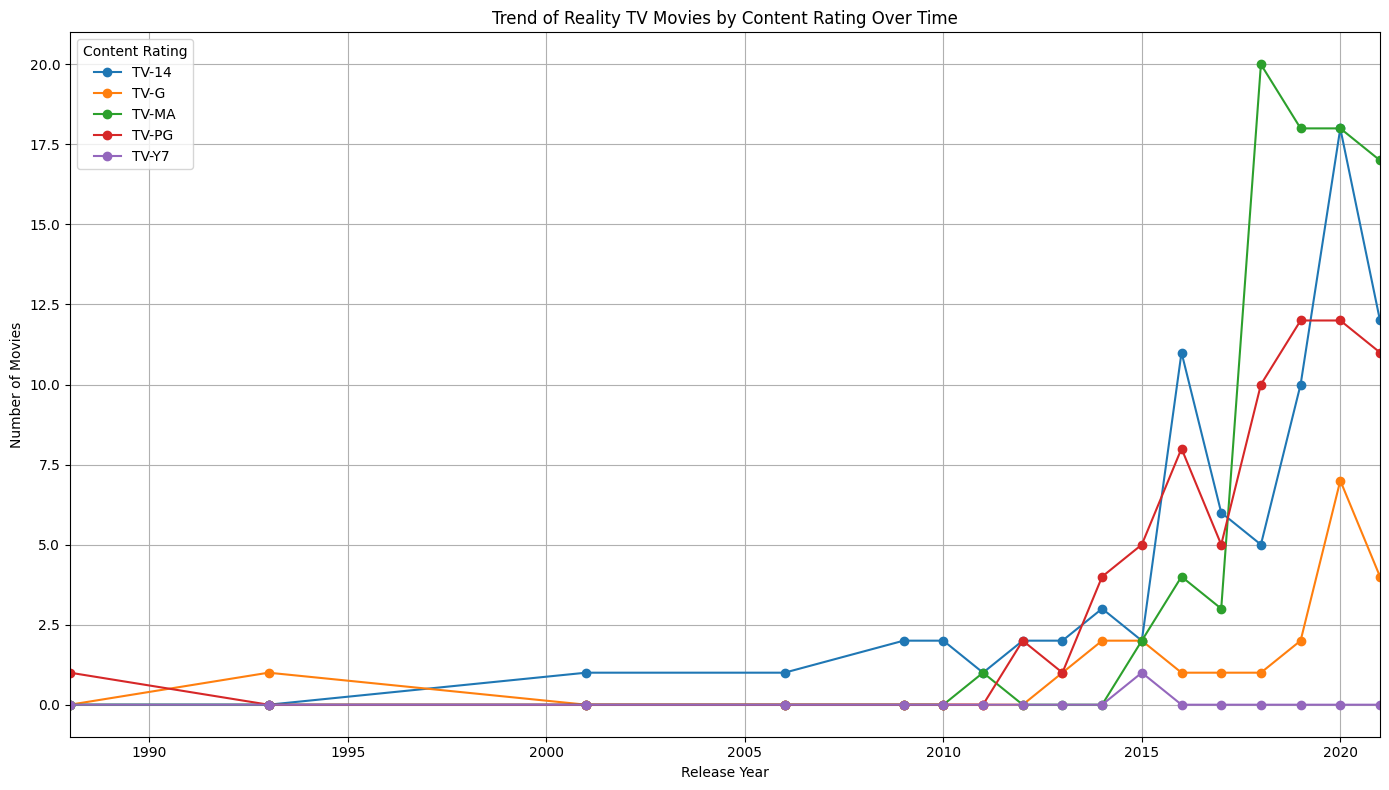

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors 

# Load the dataset
df = pd.read_csv('netflix_titles.csv')

def extract_unique_genres(df):
    """
    Extract a list of unique genres from the 'listed_in' column of the dataset.
    """
    genres = set()
    for genre_list in df['listed_in'].str.split(', '):
        genres.update(genre_list)
    return sorted(genres)

def visualize_genre_trends(df, genre):
    """
    Visualize the trend of movies by content rating over time for a selected genre.
    """
    selected_genre_movies = df[df['listed_in'].str.contains(genre, case=False, na=False)]
    genre_rating_distribution = selected_genre_movies.groupby(['release_year', 'rating']).size().unstack(fill_value=0)

    plt.figure(figsize=(14, 8))
    lines = []
    for rating in genre_rating_distribution.columns:
        line, = plt.plot(genre_rating_distribution.index, genre_rating_distribution[rating], label=rating, marker='o', linestyle='-')
        lines.append(line)

    plt.title(f'Trend of {genre} Movies by Content Rating Over Time')
    plt.xlabel('Release Year')
    plt.ylabel('Number of Movies')
    plt.legend(title='Content Rating')
    plt.grid(True)
    plt.xlim([genre_rating_distribution.index.min(), genre_rating_distribution.index.max()])

    # Add hover functionality
    cursor = mplcursors.cursor(lines, hover=True)
    @cursor.connect("add")
    def on_add(sel):
        year = int(sel.target[0])
        count = int(sel.target[1])
        rating = genre_rating_distribution.loc[year].idxmax()  # Get the rating with the highest count for the selected year
        sel.annotation.set(text=f'Year: {year}, Rating: {rating}, Count: {count}',
                           position=(20, 20)) 
        sel.annotation.get_bbox_patch().set(fc="white", alpha=1) 

    plt.tight_layout()
    plt.show()

# Extract and display unique genres for user selection
unique_genres = extract_unique_genres(df)
print("Available genres:", unique_genres)

# Example user selection process
user_selected_genre = input("Please filter a genre from the list above: ")

# Visualize trends for the user-selected genre
visualize_genre_trends(df, user_selected_genre)